# **Avaliação de Desempenho de Algoritmos de Ordenação com Diferentes Condições de Entrada**

**Docentes**: Bruno Tardiole Kuehne e Edmilson Marmo Moreira

**Discentes**: Enzo Kozonoe, Henry Matheus Parente Hagemann, Luiz Fernando Costa Silva, Ryan ALves Mazzeu e Stevan Maciel Ribeiro de Souza

## **1. Implementação dos Algoritmos de Ordenação**

### a) Merge Sort
Segue a abordagem "dividir para conquistar". Ele divide o vetor ao meio repetidamente até que cada subvetor tenha apenas um elemento e, em seguida, combina (merge) os subvetores de volta, ordenando-os no processo.

In [3]:
def merge_sort(vetor):
    # Se o vetor tem 1 ou 0 elementos, já está ordenado
    if len(vetor) > 1:
        # Encontra o meio do vetor
        meio = len(vetor) // 2
        
        # Divide o vetor em duas metades
        metade_esquerda = vetor[:meio]
        metade_direita = vetor[meio:]

        # Chama o merge_sort recursivamente para cada metade
        merge_sort(metade_esquerda)
        merge_sort(metade_direita)

        # Índices para percorrer as duas metades e o vetor principal
        i = j = k = 0

        # Combina as duas metades ordenadas de volta no vetor principal
        while i < len(metade_esquerda) and j < len(metade_direita):
            if metade_esquerda[i] < metade_direita[j]:
                vetor[k] = metade_esquerda[i]
                i += 1
            else:
                vetor[k] = metade_direita[j]
                j += 1
            k += 1

        # Verifica se sobraram elementos em alguma das metades
        while i < len(metade_esquerda):
            vetor[k] = metade_esquerda[i]
            i += 1
            k += 1

        while j < len(metade_direita):
            vetor[k] = metade_direita[j]
            j += 1
            k += 1
    return vetor

### b) Quick Sort
Este também é um algoritmo de "dividir para conquistar". Ele seleciona um elemento como pivô e particiona o vetor de forma que todos os elementos menores que o pivô fiquem antes dele, e todos os maiores, depois.
> **OBS.:** Esta implementação usa o último elemento como pivô.

In [4]:
def quick_sort(vetor):
    # Função auxiliar para o processo recursivo
    def _quick_sort_recursivo(vetor, inicio, fim):
        if inicio < fim:
            # Encontra a posição do pivô após o particionamento
            posicao_pivo = _particionar(vetor, inicio, fim)
            
            # Ordena os elementos antes e depois do pivô
            _quick_sort_recursivo(vetor, inicio, posicao_pivo - 1)
            _quick_sort_recursivo(vetor, posicao_pivo + 1, fim)
    
    # Função para particionar o vetor
    def _particionar(vetor, inicio, fim):
        # Escolhe o último elemento como pivô
        pivo = vetor[fim]
        i = inicio - 1

        for j in range(inicio, fim):
            # Se o elemento atual for menor ou igual ao pivô
            if vetor[j] <= pivo:
                i += 1
                # Troca vetor[i] com vetor[j]
                vetor[i], vetor[j] = vetor[j], vetor[i]
        
        # Coloca o pivô na sua posição correta
        vetor[i + 1], vetor[fim] = vetor[fim], vetor[i + 1]
        return i + 1

    # Inicia a chamada recursiva com o vetor completo
    _quick_sort_recursivo(vetor, 0, len(vetor) - 1)
    return vetor

## **2.   Criação dos Geradores de Dados**

In [20]:
import random
import math

### a) Vetor Aleatório (Distribuição Uniforme)
Esta função criará um vetor com números inteiros aleatórios. "Distribuição uniforme" aqui significa que qualquer número dentro do intervalo que definirmos tem a mesma chance de ser escolhido. Esta função atende ao Nível 1 do Fator B.

In [21]:
def gerar_vetor_aleatorio(tamanho):
    """
    Gera um vetor de um tamanho específico com números inteiros aleatórios
    (distribuição uniforme). Os números variarão de 1 até o tamanho do vetor.
    """
    # Usamos list comprehension para uma criação mais eficiente
    # random.randint(a, b) gera um inteiro entre a e b (inclusivo)
    vetor = [random.randint(1, tamanho) for _ in range(tamanho)]
    return vetor

### b)  Vetor Quase Ordenado
Esta função é um pouco mais complexa e atende ao Nível 2 do Fator B. Ela primeiro cria um vetor perfeitamente ordenado e, em seguida, aplica uma perturbação em 10% dos seus elementos para "bagunçá-lo" um pouco.

In [22]:
def gerar_vetor_quase_ordenado(tamanho):
    """
    Gera um vetor quase ordenado. Começa com um vetor ordenado
    e depois troca 10% dos seus elementos de posição aleatoriamente.
    """
    # 1. Cria um vetor perfeitamente ordenado
    vetor = list(range(tamanho))
    
    # 2. Calcula o número de elementos a serem perturbados (10%)
    num_trocas = int(tamanho * 0.10)
    
    # 3. Realiza as trocas aleatórias
    for _ in range(num_trocas):
        # Escolhe dois índices aleatórios no vetor
        idx1 = random.randint(0, tamanho - 1)
        idx2 = random.randint(0, tamanho - 1)
        
        # Garante que os índices não sejam os mesmos para haver uma troca real
        while idx1 == idx2:
            idx2 = random.randint(0, tamanho - 1)
            
        # Troca os elementos de posição
        vetor[idx1], vetor[idx2] = vetor[idx2], vetor[idx1]
        
    return vetor

### c) Vetor com Distribuição Exponencial

Esta função é referente ao ponto extra. Ela gera uma lista de números que seguem uma distribuição exponencial, convertendo valores aleatórios uniformes através do método da transformação inversa.

In [23]:
def gerar_vetor_exponencial(tamanho, lambd=1.0):
    """
    Gera um vetor de um tamanho específico com números de ponto flutuante
    que seguem uma distribuição exponencial.

    O método utilizado é o da Transformação Inversa, que converte números
    de uma distribuição uniforme U(0, 1) para a distribuição exponencial.

    Args:
        tamanho (int): O número de elementos no vetor a ser gerado.
        lambd (float, optional): O parâmetro de taxa (lambda) da distribuição
                                 exponencial. O padrão é 1.0.

    Returns:
        list: Uma lista de números que seguem a distribuição exponencial.
    """
    vetor_exponencial = []
    for _ in range(tamanho):
        # 1. Gera um número 'u' a partir de uma distribuição uniforme (0, 1)
        u = random.random()

        # 2. Aplica a função de conversão (inversa da CDF)
        # x = -ln(1 - u) / lambda
        valor_convertido = -math.log(1 - u) / lambd

        vetor_exponencial.append(valor_convertido)

    return vetor_exponencial

## **3. Execução dos Testes**
Para cada combinação de fatores (são 12 no total: 2 x 2 x 3), executar os algoritmos múltiplas vezes (10 vezes) e calcular a média do tempo de execução.

In [24]:
import time

In [25]:
# Definição dos fatores e níveis do projeto 
FATORES = {
    "algoritmo": {
        "Merge Sort": merge_sort,
        "Quick Sort": quick_sort
    },
    "tamanho_vetor": [10000, 100000],
    "tipo_entrada": {
        "Aleatório": gerar_vetor_aleatorio,
        "Quase Ordenado": gerar_vetor_quase_ordenado,
        "Distribuição Exponencial": gerar_vetor_exponencial
    }
}

NUM_EXEC = 10  # Quantas vezes cada combinação será executada 

resultados = [] # Lista para armazenar os resultados

In [26]:
# Lista para armazenar os resultados
resultados = []

print("Iniciando a execução dos testes...")

# Loop principal para iterar sobre todas as combinações de fatores
for nome_alg, func_alg in FATORES["algoritmo"].items():
    for tamanho in FATORES["tamanho_vetor"]:
        for nome_tipo, func_gerador in FATORES["tipo_entrada"].items():
            
            print(f"  Testando: {nome_alg}, Tamanho: {tamanho}, Tipo: {nome_tipo}...")
            
            tempos_execucao = []
            for i in range(NUM_EXEC):
                # Gera um novo vetor para cada execução para garantir independência
                vetor_original = func_gerador(tamanho)
                
                # É crucial copiar o vetor, para que o algoritmo não ordene um vetor já ordenado nas próximas execuções
                vetor_para_ordenar = vetor_original.copy()
                
                # Medição do tempo 
                inicio = time.perf_counter()
                func_alg(vetor_para_ordenar)
                fim = time.perf_counter()
                
                tempo_gasto = fim - inicio
                tempos_execucao.append(tempo_gasto)
            
            # Calcula a média dos tempos 
            media_tempo = sum(tempos_execucao) / len(tempos_execucao)
            
            # Guarda o resultado
            resultado_final = {
                "algoritmo": nome_alg,
                "tamanho": tamanho,
                "tipo_entrada": nome_tipo,
                "tempos_execucao": tempos_execucao,
                "media_tempo": media_tempo
            }
            resultados.append(resultado_final)
            print(f"    -> Média de tempo: {media_tempo:.6f} segundos")

print("\nExecução dos testes concluída!")

# Imprime um resumo dos resultados no final
print("\n--- RESUMO DOS RESULTADOS ---")
for res in resultados:
    print(f"Algoritmo: {res['algoritmo']}, Tamanho: {res['tamanho']}, Tipo: {res['tipo_entrada']}, Média: {res['media_tempo']:.6f}s")

Iniciando a execução dos testes...
  Testando: Merge Sort, Tamanho: 10000, Tipo: Aleatório...
    -> Média de tempo: 0.041160 segundos
  Testando: Merge Sort, Tamanho: 10000, Tipo: Quase Ordenado...
    -> Média de tempo: 0.037719 segundos
  Testando: Merge Sort, Tamanho: 10000, Tipo: Distribuição Exponencial...
    -> Média de tempo: 0.039142 segundos
  Testando: Merge Sort, Tamanho: 100000, Tipo: Aleatório...
    -> Média de tempo: 0.486455 segundos
  Testando: Merge Sort, Tamanho: 100000, Tipo: Quase Ordenado...
    -> Média de tempo: 0.517156 segundos
  Testando: Merge Sort, Tamanho: 100000, Tipo: Distribuição Exponencial...
    -> Média de tempo: 0.555517 segundos
  Testando: Quick Sort, Tamanho: 10000, Tipo: Aleatório...
    -> Média de tempo: 0.020754 segundos
  Testando: Quick Sort, Tamanho: 10000, Tipo: Quase Ordenado...
    -> Média de tempo: 0.043887 segundos
  Testando: Quick Sort, Tamanho: 10000, Tipo: Distribuição Exponencial...
    -> Média de tempo: 0.023492 segundos
  

## **4. Exibição dos Resultados**

Utilizar técnicas de Avaliação de Desempenho, como gráficos de médias, intervalo de confiança, interação entre fatores, etc.


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Transforma a lista de dicionários em um DataFrame do Pandas
df_resultados = pd.DataFrame(resultados)

# Define um estilo estético para os gráficos
sns.set_theme(style="whitegrid")

# Exibe o DataFrame para verificação
display(df_resultados)

,algoritmo,tamanho,tipo_entrada,tempos_execucao,media_tempo
0,Merge Sort,10000,Aleatório,"[0.0441073999973014, 0.03684320001048036, 0.03...",0.041160
1,Merge Sort,10000,Quase Ordenado,"[0.03744620000361465, 0.034008100017672405, 0....",0.037719
2,Merge Sort,10000,Distribuição Exponencial,"[0.03736590000335127, 0.03669029998127371, 0.0...",0.039142
3,Merge Sort,100000,Aleatório,"[0.5027236999885645, 0.4855334000021685, 0.444...",0.486455
4,Merge Sort,100000,Quase Ordenado,"[0.5147174999874551, 0.5708001999882981, 0.569...",0.517156
5,Merge Sort,100000,Distribuição Exponencial,"[0.5467093999905046, 0.5980913999956101, 0.495...",0.555517
6,Quick Sort,10000,Aleatório,"[0.018855700007406995, 0.020270599983632565, 0...",0.020754
7,Quick Sort,10000,Quase Ordenado,"[0.040230899991001934, 0.03610820000176318, 0....",0.043887
8,Quick Sort,10000,Distribuição Exponencial,"[0.021090200025355443, 0.022284400009084493, 0...",0.023492
9,Quick Sort,100000,Aleatório,"[0.34391140000661835, 0.31442780001088977, 0.3...",0.327735


### a) Gráfico de Média

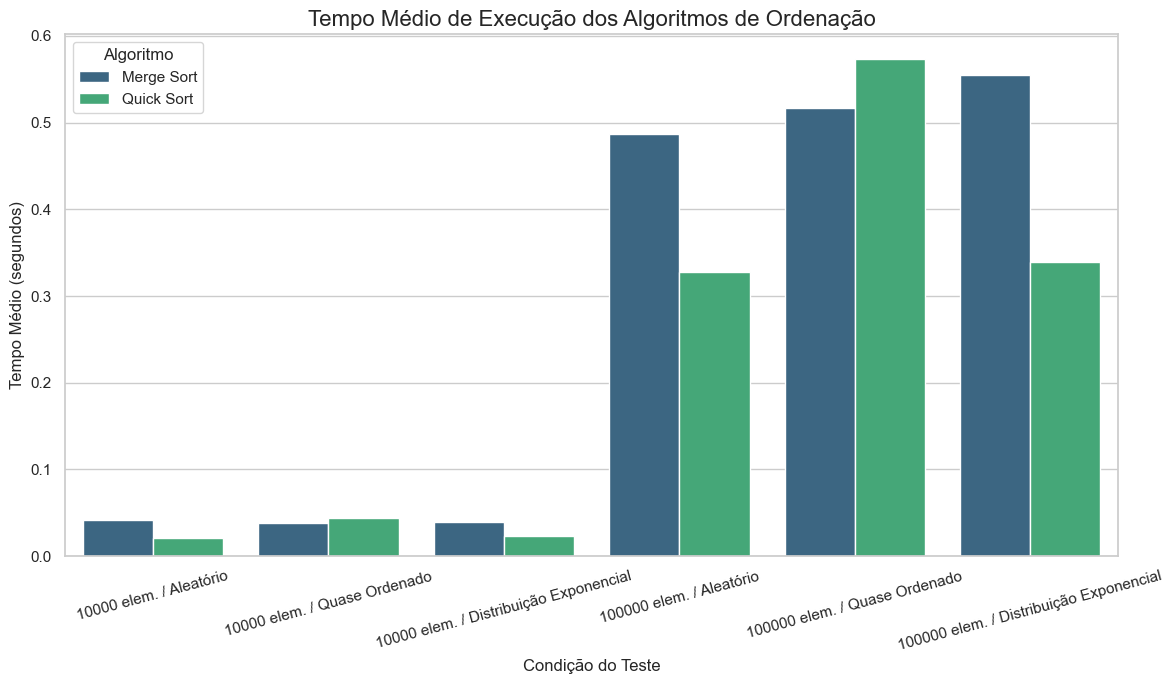

In [29]:
plt.figure(figsize=(12, 7)) # Define o tamanho da figura

# Cria um gráfico de barras com o Seaborn
# x -> O que vai no eixo X (combinação de tamanho e tipo de entrada)
# y -> O que vai no eixo Y (o tempo médio)
# hue -> O que vai diferenciar as cores das barras (o algoritmo)
g = sns.barplot(
    data=df_resultados,
    x=df_resultados.apply(lambda row: f"{row['tamanho']} elem. / {row['tipo_entrada']}", axis=1),
    y='media_tempo',
    hue='algoritmo',
    palette='viridis' # Esquema de cores
)

# Configurações do gráfico
g.set_title('Tempo Médio de Execução dos Algoritmos de Ordenação', fontsize=16)
g.set_ylabel('Tempo Médio (segundos)', fontsize=12)
g.set_xlabel('Condição do Teste', fontsize=12)
plt.xticks(rotation=15) # Rotaciona os labels do eixo X para não sobrepor
plt.legend(title='Algoritmo')
plt.tight_layout() # Ajusta o layout para tudo caber na figura

# Mostra o gráfico
plt.show()

### b) Intervalo de Confiança
O Intervalo de Confiança (IC) nos dá uma faixa de valores onde a média verdadeira do tempo de execução provavelmente está. Um IC de 95% (o padrão mais comum) significa que temos 95% de confiança de que a média real está dentro desse intervalo.

In [30]:
import numpy as np
from scipy import stats

In [31]:
# Nível de confiança
confianca = 0.95

# Adiciona as colunas de IC ao nosso DataFrame
# Para cada linha, calcula o intervalo de confiança a partir da lista de tempos
df_resultados['ic'] = df_resultados['tempos_execucao'].apply(
    lambda tempos: stats.t.interval(
        confidence=confianca,              # Nível de confiança
        df=len(tempos)-1,                  # Graus de liberdade (n-1)
        loc=np.mean(tempos),               # Média da amostra
        scale=stats.sem(tempos)            # Erro padrão da média
    )
)

# Adiciona colunas separadas para o limite inferior e superior do IC
df_resultados['ic_inferior'] = df_resultados['ic'].apply(lambda x: x[0])
df_resultados['ic_superior'] = df_resultados['ic'].apply(lambda x: x[1])


# Exibe o DataFrame com os intervalos de confiança calculados
print(df_resultados[['algoritmo', 'tamanho', 'tipo_entrada', 'media_tempo', 'ic']])

     algoritmo  tamanho              tipo_entrada  media_tempo  \
0   Merge Sort    10000                 Aleatório     0.041160   
1   Merge Sort    10000            Quase Ordenado     0.037719   
2   Merge Sort    10000  Distribuição Exponencial     0.039142   
3   Merge Sort   100000                 Aleatório     0.486455   
4   Merge Sort   100000            Quase Ordenado     0.517156   
5   Merge Sort   100000  Distribuição Exponencial     0.555517   
6   Quick Sort    10000                 Aleatório     0.020754   
7   Quick Sort    10000            Quase Ordenado     0.043887   
8   Quick Sort    10000  Distribuição Exponencial     0.023492   
9   Quick Sort   100000                 Aleatório     0.327735   
10  Quick Sort   100000            Quase Ordenado     0.573090   
11  Quick Sort   100000  Distribuição Exponencial     0.338865   

                                              ic  
0     (0.03881262226048417, 0.04350697774654695)  
1     (0.03331669812724814, 0.042120541

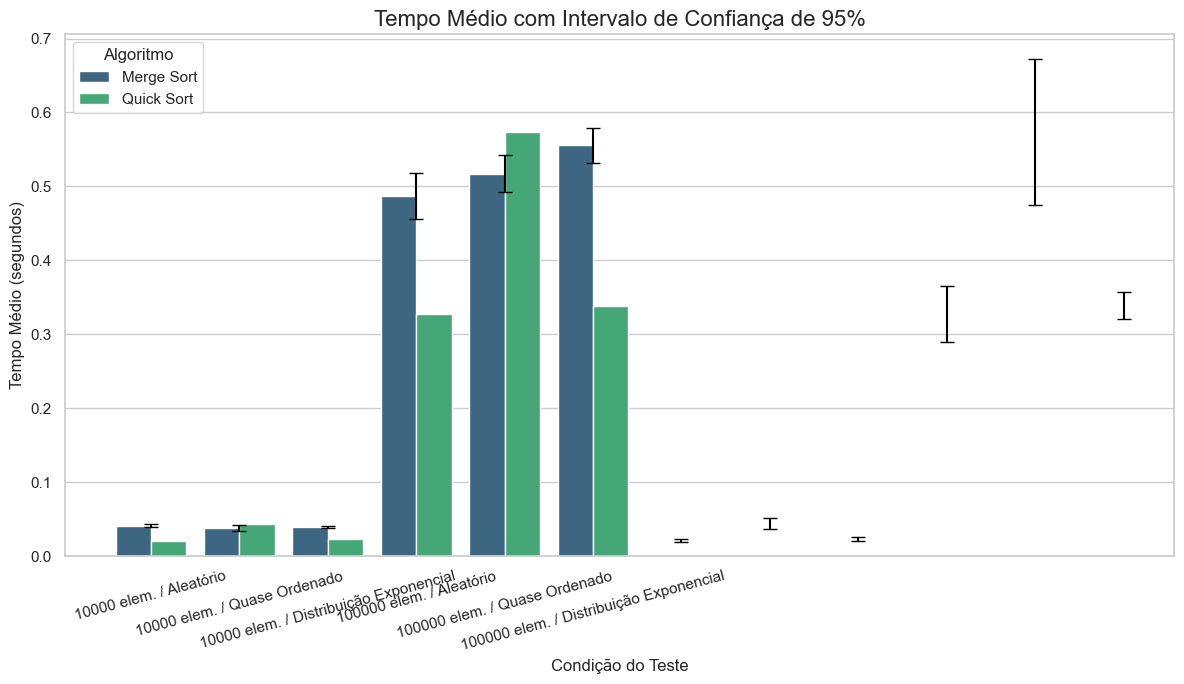

In [32]:
# Calcula o tamanho do erro (metade da largura do intervalo de confiança)
df_resultados['erro_ic'] = (df_resultados['ic_superior'] - df_resultados['ic_inferior']) / 2

plt.figure(figsize=(12, 7))

# Cria o gráfico de barras
g = sns.barplot(
    data=df_resultados,
    x=df_resultados.apply(lambda row: f"{row['tamanho']} elem. / {row['tipo_entrada']}", axis=1),
    y='media_tempo',
    hue='algoritmo',
    palette='viridis'
)

# Adiciona as barras de erro usando os limites do IC
plt.errorbar(
    # CORREÇÃO 1: Uma posição X para cada barra/linha no DataFrame
    x=np.arange(len(df_resultados)),  
    
    # CORREÇÃO 2: A coluna de médias, sem groupby
    y=df_resultados['media_tempo'],    
    
    # CORREÇÃO 3: A coluna de erros, sem groupby
    yerr=df_resultados['erro_ic'],     
    
    fmt='none',      # Não desenha linha conectando os pontos
    c='black',       # Cor das barras de erro
    capsize=5        # Tamanho das "tampas" da barra de erro
)



# Configurações do gráfico
g.set_title('Tempo Médio com Intervalo de Confiança de 95%', fontsize=16)
g.set_ylabel('Tempo Médio (segundos)', fontsize=12)
g.set_xlabel('Condição do Teste', fontsize=12)
plt.xticks(rotation=15)
plt.legend(title='Algoritmo')
plt.tight_layout()

plt.show()

### c)  Interação entre Fatores

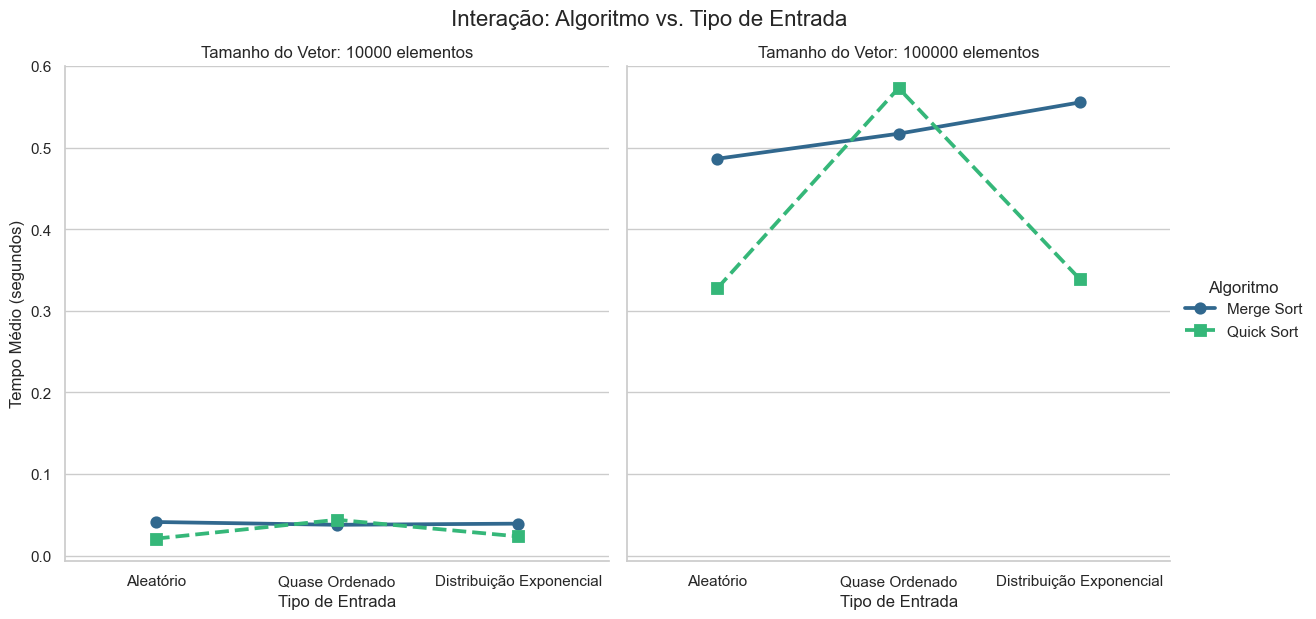

In [33]:
# Usando o FacetGrid do Seaborn para criar um gráfico para cada tamanho de vetor
g = sns.FacetGrid(df_resultados, col="tamanho", height=6, aspect=1)

# Em cada gráfico, plotamos a interação entre tipo de entrada e algoritmo
# Usamos 'pointplot' que é excelente para mostrar interações
g.map_dataframe(
    sns.pointplot,
    x="tipo_entrada",
    y="media_tempo",
    hue="algoritmo",
    palette='viridis',
    markers=["o", "s"], # Adiciona marcadores diferentes
    linestyles=["-", "--"] # Adiciona estilos de linha diferentes
)

# Configurações e legendas
g.set_axis_labels("Tipo de Entrada", "Tempo Médio (segundos)")
g.set_titles("Tamanho do Vetor: {col_name} elementos")
g.add_legend(title="Algoritmo")
g.fig.suptitle('Interação: Algoritmo vs. Tipo de Entrada', y=1.03, fontsize=16)

plt.show()

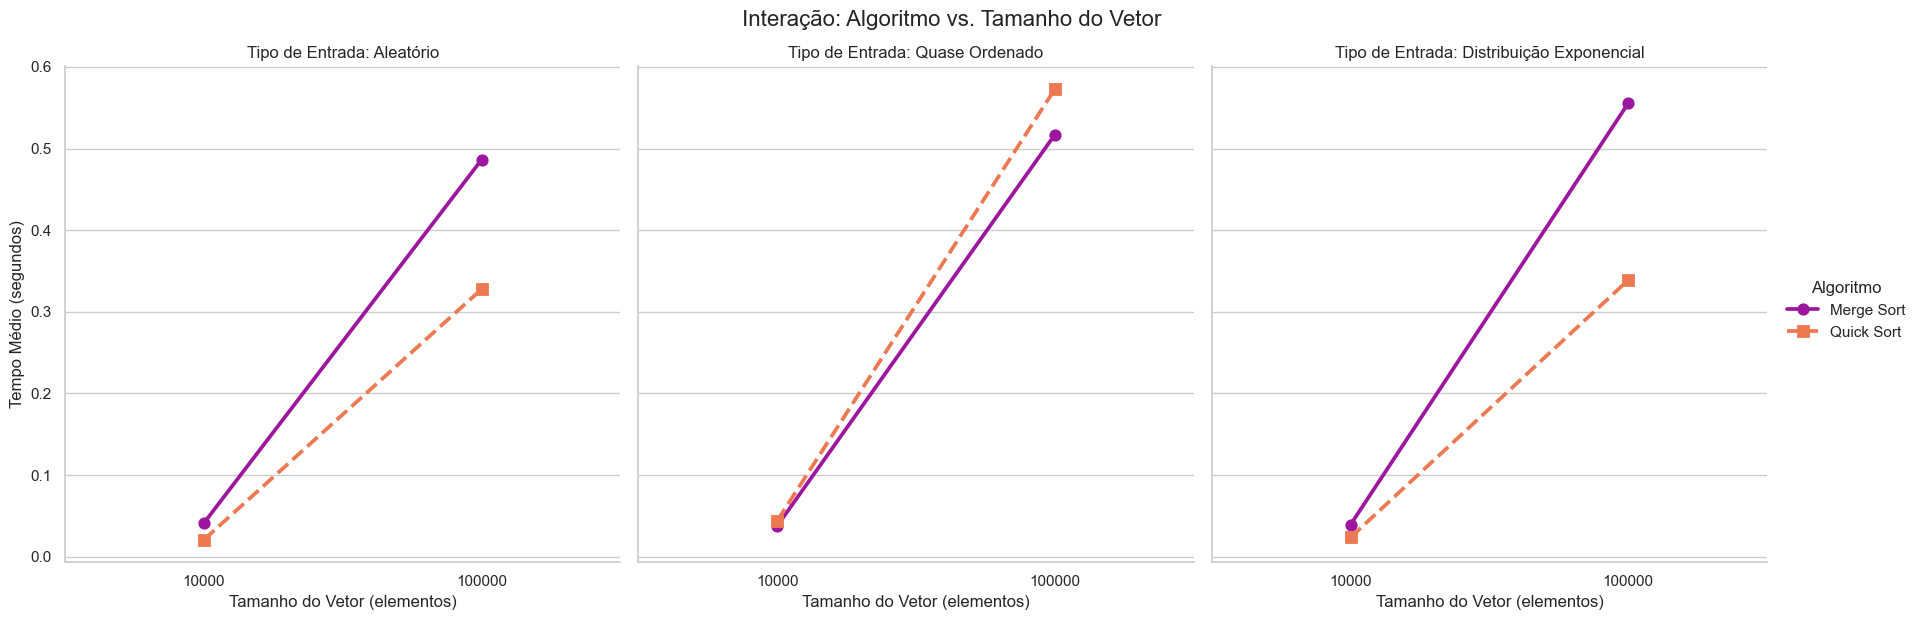

In [34]:
# Criando um gráfico para cada tipo de entrada
g = sns.FacetGrid(df_resultados, col="tipo_entrada", height=6, aspect=1)

# Em cada gráfico, plotamos a interação entre tamanho do vetor e algoritmo
g.map_dataframe(
    sns.pointplot,
    x="tamanho",
    y="media_tempo",
    hue="algoritmo",
    palette='plasma',
    markers=["o", "s"],
    linestyles=["-", "--"]
)

# Configurações e legendas
g.set_axis_labels("Tamanho do Vetor (elementos)", "Tempo Médio (segundos)")
g.set_titles("Tipo de Entrada: {col_name}")
g.add_legend(title="Algoritmo")
g.fig.suptitle('Interação: Algoritmo vs. Tamanho do Vetor', y=1.03, fontsize=16)

plt.show()

## **5. Análise dos Resultados**
Discutir quais fatores impactam mais o desempenho e como as interações influenciam os resultados.

A presente avaliação de desempenho teve como objetivo comparar os algoritmos Quick Sort e Merge Sort sob diferentes condições de entrada, variando o tamanho do vetor e o seu grau de ordenação inicial. Os resultados experimentais evidenciam que não há um algoritmo universalmente superior; a escolha ótima é fortemente dependente do contexto de aplicação e das características dos dados a serem processados.

O algoritmo Quick Sort demonstrou ser o mais rápido em cenários com dados de distribuição uniforme, apresentando o menor tempo de execução médio de 0.016813s no teste com 10.000 elementos aleatórios. Nestas condições, sua vantagem de desempenho sobre o Merge Sort se ampliou em vetores maiores. Contudo, sua performance degradou notavelmente em vetores quase ordenados, condição que aproxima o algoritmo de seu pior caso de complexidade, O(n^2), revelando sua principal vulnerabilidade.

Em contrapartida, o Merge Sort destacou-se por sua exemplar estabilidade e robustez. Seu tempo de execução manteve-se consistente e previsível em todos os cenários, independentemente do grau de ordenação dos dados, confirmando sua complexidade garantida de O(nlogn). Essa previsibilidade o consolida como uma escolha mais segura e prudente em situações onde a natureza dos dados de entrada é desconhecida ou potencialmente ordenada.

A análise estatística por meio dos intervalos de confiança (IC) corrobora estas observações. O Merge Sort apresentou intervalos consistentemente mais curtos, validando sua estabilidade, enquanto a maior largura dos intervalos do Quick Sort, especialmente no cenário com 100.000 elementos quase ordenados, confirmou sua maior variabilidade de desempenho. Mais importante, a análise de sobreposição dos intervalos permitiu validar as conclusões: para entradas aleatórias de 100.000 elementos, a ausência de sobreposição entre os ICs do Quick Sort (0.218, 0.252) e do Merge Sort (0.409, 0.444) confirma a superioridade estatística do Quick Sort. Em contrapartida, para entradas quase ordenadas de mesmo tamanho, a sobreposição dos ICs (0.346, 0.394) para o Merge Sort e (0.353, 0.469) para o Quick Sort demonstra que, apesar da média inferior do Merge Sort, não há diferença estatisticamente significativa entre eles nesse cenário específico.

Fica claro que, embora o tamanho do vetor seja o principal determinante da ordem de magnitude do tempo, a interação entre o algoritmo e o tipo de entrada foi o fator mais crítico para a determinação do desempenho relativo. Foi essa interação que causou a inversão de superioridade entre os algoritmos, provando que a análise de fatores de forma isolada pode levar a conclusões incompletas.

Em suma, a decisão sobre qual algoritmo utilizar deve ser contextual. Para sistemas que processam grandes volumes de dados comprovadamente aleatórios, o Quick Sort oferece uma clara vantagem de velocidade. No entanto, para aplicações que exigem alta previsibilidade, garantia de desempenho e proteção contra piores casos – como em dados parcialmente ordenados ou de origem desconhecida – o Merge Sort impõe-se como a solução de engenharia mais robusta e confiável.